# Median of means LASSO

The aim of this notebook is to compare the  performances of the **classical LASSO** estimator to the one of the **MOM LASSO** estimator. In particular, we want to test the **robustess** properties of the two estimators. Here robustess should be tested in the following setup:
1. dataset corrupted by **bad data**  (terminolgogy borrowed from Huber's book on robust statictics) these are ``outliers'' -- that is data which have nothing to do with the parameter we want to estimate.
2. **heavy-tailed noise**


===================================
$\newcommand{\inr}[1]{\bigl< #1 \bigr>}$
$\newcommand{\norm}[1]{\left\|#1\right\|}$
$\newcommand{\to}{\rightarrow}$
$\newcommand{\hM}{\hat f}$
$\newcommand{\hrho}{\hat \rho}$
$\newcommand{\hmu}{\boldsymbol{\hat \mu}}$
$\newcommand{\htheta}{{\boldsymbol{\hat \theta}}}$
$\newcommand{\tildemu}{{\boldsymbol{\tilde \mu}}}$
$\DeclareMathOperator*{\argmax}{argmax}$
$\DeclareMathOperator*{\argmin}{argmin}$
$\DeclareMathOperator*{\supp}{Supp}$
$\DeclareMathOperator{\limInf}{liminf}$
$\DeclareMathOperator{\limSup}{limsup}$
$\DeclareMathOperator{\pen}{pen}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\Span}{span}$
$\DeclareMathOperator{\conv}{conv}$
$\DeclareMathOperator*{\rank}{rank}$
$\newcommand{\blue}[1]{{\color{blue} #1}}$
$\newcommand{\green}[1]{{\color{green} #1}}$
$\newcommand{\red}[1]{{\color{red} #1}}$
$\newcommand \cA{{\cal A}}$
$\newcommand \cB{{\cal B}}$
$\newcommand \cC{{\cal C}}$
$\newcommand \cD{{\cal D}}$
$\newcommand \cE{{\cal E}}$
$\newcommand \cF{{\cal F}}$
$\newcommand \cG{{\cal G}}$
$\newcommand \cH{{\cal H}}$
$\newcommand \cI{{\cal I}}$
$\newcommand \cJ{{\cal J}}$
$\newcommand \cK{{\cal K}}$
$\newcommand \cL{{\cal L}}$
$\newcommand \cM{{\cal M}}$
$\newcommand \cN{{\cal N}}$
$\newcommand \cO{{\cal O}}$
$\newcommand \cP{{\cal P}}$
$\newcommand \cQ{{\cal Q}}$
$\newcommand \cR{{\cal R}}$
$\newcommand \cS{{\cal S}}$
$\newcommand \cT{{\cal T}}$
$\newcommand \cU{{\cal U}}$
$\newcommand \cV{{\cal V}}$
$\newcommand \cW{{\cal W}}$
$\newcommand \cX{{\cal X}}$
$\newcommand \cY{{\cal Y}}$
$\newcommand \cZ{{\cal Z}}$
$\newcommand \bA{{\mathbb A}}$
$\newcommand \bB{{\mathbb B}}$
$\newcommand \bC{{\mathbb C}}$
$\newcommand \bD{{\mathbb D}}$
$\newcommand \bE{{\mathbb E}}$
$\newcommand \bF{{\mathbb F}}$
$\newcommand \bG{{\mathbb G}}$
$\newcommand \bH{{\mathbb H}}$
$\newcommand \bI{{\mathbb I}}$
$\newcommand \bJ{{\mathbb J}}$
$\newcommand \bK{{\mathbb K}}$
$\newcommand \bL{{\mathbb L}}$
$\newcommand \bM{{\mathbb M}}$
$\newcommand \bN{{\mathbb N}}$
$\newcommand \bO{{\mathbb O}}$
$\newcommand \bP{{\mathbb P}}$
$\newcommand \bQ{{\mathbb Q}}$
$\newcommand \bR{{\mathbb R}}$
$\newcommand \bS{{\mathbb S}}$
$\newcommand \bT{{\mathbb T}}$
$\newcommand \bU{{\mathbb U}}$
$\newcommand \bV{{\mathbb V}}$
$\newcommand \bW{{\mathbb W}}$
$\newcommand \bX{{\mathbb X}}$
$\newcommand \bY{{\mathbb Y}}$
$\newcommand \bZ{{\mathbb Z}}$

$\newcommand \fA{{\mathfrak A}}$
$\newcommand \fB{{\mathfrak B}}$
$\newcommand \fC{{\mathfrak C}}$
$\newcommand \fD{{\mathfrak D}}$
$\newcommand \fE{{\mathfrak E}}$
$\newcommand \fF{{\mathfrak F}}$
$\newcommand \fG{{\mathfrak G}}$
$\newcommand \fH{{\mathfrak H}}$
$\newcommand \fI{{\mathfrak I}}$
$\newcommand \fJ{{\mathfrak J}}$
$\newcommand \fK{{\mathfrak K}}$
$\newcommand \fL{{\mathfrak L}}$
$\newcommand \fM{{\mathfrak M}}$
$\newcommand \fN{{\mathfrak N}}$
$\newcommand \fO{{\mathfrak O}}$
$\newcommand \fP{{\mathfrak P}}$
$\newcommand \fQ{{\mathfrak Q}}$
$\newcommand \fR{{\mathfrak R}}$
$\newcommand \fS{{\mathfrak S}}$
$\newcommand \fT{{\mathfrak T}}$
$\newcommand \fU{{\mathfrak U}}$
$\newcommand \fV{{\mathfrak V}}$
$\newcommand \fW{{\mathfrak W}}$
$\newcommand \fX{{\mathfrak X}}$
$\newcommand \fY{{\mathfrak Y}}$
$\newcommand \fZ{{\mathfrak Z}}$
$\newcommand{\vmu}{{\boldsymbol{\mu}}}$
$\newcommand{\vf}{{\mathbf{f}}}$
$\newcommand{\vtheta}{{\boldsymbol{\theta}}}$
$\newcommand{\vbeta}{{\boldsymbol{\beta}}}$
$\newcommand{\vc}{{\boldsymbol{1}}}$
$\newcommand{\vlambda}{{\boldsymbol{\lambda}}}$
$\newcommand{\vv}{{\boldsymbol{v}}}$
$\newcommand{\vh}{{\boldsymbol{h}}}$
$\newcommand{\ve}{{\boldsymbol{e}}}$
$\newcommand{\vzero}{{\boldsymbol{0}}}$
$\newcommand{\vx}{{\boldsymbol{x}}}$
$\newcommand{\vz}{{\boldsymbol{z}}}$
$\newcommand{\vu}{{\boldsymbol{u}}}$
$\newcommand{\vw}{{\boldsymbol{w}}}$
$\newcommand{\vb}{{\boldsymbol{b}}}$
$\newcommand{\vy}{\mathbf{y}}$
$\newcommand{\vxi}{{\boldsymbol{\xi}}}$
$\newcommand{\vg}{{\boldsymbol{g}}}$
$\newcommand{\vI}{{\boldsymbol{I}}}$
$\newcommand{\vdelta}{{\boldsymbol{\delta}}}$

In [1]:
import numpy as np
from numpy.random import multivariate_normal, randn
from numpy.linalg import norm
from numpy import sqrt
from scipy.linalg import svd
from scipy.linalg.special_matrices import toeplitz
from scipy import linalg
import matplotlib.pylab as plt
import time
from sklearn.utils import shuffle

np.set_printoptions(precision=2)
%matplotlib inline

## Construction of datasets
The ideal setup for the LASSO is the Gaussian linear model i.e.
\begin{equation}
Y=\inr{X, \beta} + \zeta \hspace{2cm} (M)
\end{equation}
where 
1. the design vector $X$ is a standard Gaussian random vector in $\bR^d$
2. the noise $\zeta$ is a real-valued centered Gaussian noise with variance $\sigma^2$ independent of $X$

In the following we construct various datasets in order to test the robustess properties of the two LASSO and MOM-LASSO estimators:
1. the **ideal dataset**: $\cD_1 = \{(X_1,Y_1), \cdots, (X_N,Y_N)\}$ where $(X_i,Y_i)_{i=1}^N$ are $N$ i.i.d. copies of $(X, Y)$ distributed according to model (M).
2. corruption of the ideal dataset $\cD_1$ by a outliers data. The theory allows for complete outliers. We will therefore test for various choices of **outliers** in $\cD_2=\{(X^\prime_1, Y^\prime_1), \cdots, (X^\prime_m, Y^\prime_m)\}$. For instance, the $(X^\prime_i, Y^\prime_i)$ may be 
    1. deterministic all equal to $(\ve, 0)$ where $\ve=(1)_{i=1}^d$ or to $(\ve, 1000)$, 
    2. We may also consider i.i.d. outliers distributed according to $(X^\prime, Y^\prime)$ where $X^\prime$ is uniformly distributed in the unit cube $[0,1]^d$ and $Y^\prime$ is a $0-1$ bernoulli random variable, 
    3. We also know that the LASSO does not behave well when features are correlated so we may try to construct a data set $\cD_2$ following model (M) but with a design $X$ is distributed according to a centered Gaussian vector in $\bR^d$ with covariance matrix $\Sigma=(\rho^{|p-q|})_{p,q=1,\cdots, d}$.
3. we construct a dataset with i.i.d. data following a linear model with heavy-tailed noise. That is a model like (M) but where the noise $\zeta$ is distributed according to **heavy-tailed distribution** like various student distribution. We denote this dataset by $\cD_3$.

### construction of sparse parameters $\beta$

In [2]:
def beta_func(n_features, sparsity):
    idx = np.arange(n_features)
    beta = (n_features/10)*(-1) ** (abs(idx - 1)) * np.exp(-idx / 10.)
    sel = np.random.permutation(n_features)
    sel1 = sel[0:int(sparsity/4)]
    beta[sel1] = 10
    sel11 = sel[int(sparsity/4):int(sparsity/2)]
    beta[sel11] = -10
    sel0 = sel[sparsity:]
    beta[sel0] = 0.
    return beta

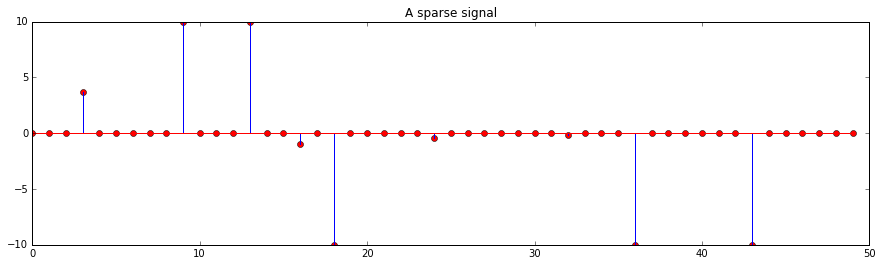

In [3]:
n_features, sparsity = 50, 10
beta_0 = beta_func(n_features, sparsity)
plt.figure(figsize = (15, 4))
plt.stem(beta_0, markerfmt='ro', label='true')
plt.title('A sparse signal')

### Construction of the $N\times d$ design  matrix $\bX$
with i.i.d. rows vectors in $\bR^d$ distributed according to $\cN(\vzero, \Sigma)$ where $\Sigma$ is a $d\times d$ Toeplitz matrix $(\rho^{|p-q|})_{1\leq p,q\leq d}$.

In [4]:
def feature_mat(n_features, n_samples, rho):
    cov = toeplitz(rho ** np.arange(0, n_features))
    design = multivariate_normal(np.zeros(n_features), cov, size=n_samples)
    return design

### Construction of the datasets:
1. **ideal dataset**: $\cD_1$ where $X\sim \cN(\vzero, \vI_{d\times d}), Y=\inr{X, \beta} + \zeta$ and $\zeta\sim\cN(0, \sigma^2)$ is independent of $X$.
2. **outliers dataset**: $\cD_2$ where the outliers are all equal to $(\ve, 0)$ where $\ve=(1)_{i=1}^d$ or to $(\ve, 1000)$, or $(X^\prime, Y^\prime)$ where $X^\prime$ is uniformly distributed in the unit cube $[0,1]^d$ and $Y^\prime$ is a $0-1$ bernoulli random variable, or (M) holds with $X\sim \cN(\vzero, \Sigma)$ where $\Sigma=(\rho^{|p-q|})_{p,q=1,\cdots, d}$.
3. **dataset with heavy-tailed noise**: $\cD_3$ where $X\sim \cN(\vzero, \vI_{d\times d}), Y=\inr{X, \beta} + \zeta$ and $\zeta\sim {\rm Student}(order = p)$ is independent of $X$.

In the following, we consider several configurations like $\cD = \cD_1$ or $\cD_1\cup\cD_2$ or $\cD_1\cup\cD_2\cup\cD_2$.

In [5]:
def data1(n_samples, beta, sigma):
    n_features = beta.size
    cov = np.identity(n_features)
    X = multivariate_normal(np.zeros(n_features), cov, size=n_samples)
    Y = X.dot(beta) + sigma * randn(n_samples)
    return Y, X

def data2(n_outliers, n_features, type_outliers = 1, beta = 1, rho=1):
    if type_outliers == 1:
        Y = np.ones(n_outliers)
        X = np.ones((n_outliers, n_features))
    elif type_outliers == 2:
        Y = 10000*np.ones(n_outliers)
        X = np.ones((n_outliers, n_features))
    elif type_outliers == 3:
        Y = np.random.randint(2, size = n_outliers)
        X = np.random.rand(n_outliers, n_features)
    else:
        cov = np.identity(n_features)
        X = feature_mat(n_features, n_outliers, rho)
        Y = X.dot(beta) + sigma * randn(n_samples)
    return Y, X
        
def data3(n_heavy_tail, beta, deg = 2):
    n_features = beta.size
    cov = np.identity(n_features)
    X = multivariate_normal(np.zeros(n_features), cov, size=n_heavy_tail)
    Y = X.dot(beta) + np.random.standard_t(deg, size=n_heavy_tail)
    return Y, X

def data_merge(Y1, X1, Y2, X2):
    Y = np.concatenate((Y1, Y2), axis=0)
    X = np.concatenate((X1, X2), axis=0)
    return shuffle(Y, X)

# Procedures
The **LASSO** is the regularized empirical risk minimization estimator:
\begin{equation}
\hat{\beta}\in\argmin_{t\in\bR^d}\left(\norm{\bY-\bX t}_{2,N}^2 + \lambda \norm{t}_1\right)
\end{equation}where $\bY=(Y_i)_{i=1}^N$ is the vector of outputs and $\bX\in\bR^{N\times d}$ is the design matrix with i.i.d. rows vectors $X_1, \ldots, X_N$.

The **MOM LASSO** is the min-max estimator:
\begin{equation}
\hat{\beta}\in\argmin_{t\in\bR^d}\sup_{t^\prime \in\bR^d} {\rm MOM}_K(\ell_{t} - \ell_{t^\prime}) + \lambda \left(\norm{t}_1-\norm{t^\prime}_1\right)
\end{equation}where $\ell_t(X, Y) = (Y-\inr{X, t})^2$ and 
\begin{equation}
{\rm MOM}_K(\ell_t-\ell_{t^\prime}) = {\rm Median}\left(P_{B_1}(\ell_t-\ell_{t^\prime}), \cdots, P_{B_K}(\ell_t-\ell_{t^\prime})\right)
\end{equation} for $B_1\cup\cdots\cup B_K$  an equipartition of the dataset $\cD=\{(X_i, Y_i):i=1,\ldots, N\}$ and 
\begin{equation}
P_B (\ell_t-\ell_{t^\prime}) = \frac{1}{|B|}\sum_{i\in B}\left(\left(Y_i-\inr{X_i, t}\right)^2-\left(Y_i-\inr{X_i, t^\prime}\right)^2\right)
\end{equation}

In [6]:
def median_index(vector):
    med = np.median(vector)
    idx = np.nanargmin(np.abs(vector-med))
    return idx

def block(X, y, x, x_prime, K):
    vect_means = []
    N = y.size
    for k in np.arange(0,K):
        Xk, yk = X[k*int(N/K):(k+1)*int(N/K)], y[k*int(N/K):(k+1)*int(N/K)]
        excess_loss_k = linalg.norm(Xk.dot(x) - yk) ** 2 - linalg.norm(Xk.dot(x_prime) - yk) ** 2
        vect_means.append(excess_loss_k)
    idx_med = median_index(vect_means)
    #print(idx_med)
    return X[idx_med*int(N/K):(idx_med+1)*int(N/K)], y[idx_med*int(N/K):(idx_med+1)*int(N/K)]

## Taken from Niao He webpage [here](http://niaohe.ise.illinois.edu/IE598/lasso_demo/index.html) or Alexandre Gramfort [here](http://www.codegists.com/code/lasso%20ista%20fista/)

In [7]:
n_features, sparsity = 30, 10
beta_0 = beta_func(n_features, sparsity)

In [8]:
N, n_features, sparsity, sigma = 100, 30, 10, 0
np.random.seed(50)

beta_0 = beta_func(n_features, sparsity)
y, X = data1(N, beta_0, sigma)

beta_0 = np.matrix(beta_0).T
y = np.matrix(y).T
X = np.matrix(X)

lamda = 1/np.sqrt(N)

In [9]:
import cvxpy as cvx

w = cvx.Variable(n_features)
loss = cvx.sum_squares(X*w-y)/2 + lamda * cvx.norm(w,1)

problem = cvx.Problem(cvx.Minimize(loss))
problem.solve(verbose=True) 
opt = problem.value
print('Optimal Objective function value is: {}'.format(opt))


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -5.110e-19  -7.098e-03  +4e+02  9e-01  2e-01  1e+00  6e+00    ---    ---    1  1  - |  -  - 
 1  +5.996e+01  +6.298e+01  +2e+02  4e-01  2e-01  4e+00  3e+00  0.8373  4e-01   1  1  1 |  0  0
 2  +2.886e+00  +5.058e+00  +6e+01  1e-01  9e-02  2e+00  9e-01  0.8455  2e-01   2  2  1 |  0  0
 3  +7.678e+00  +7.975e+00  +1e+01  1e-02  6e-03  3e-01  2e-01  0.8268  6e-02   2  1  1 |  0  0
 4  +5.315e+00  +5.375e+00  +2e+00  1e-03  6e-04  6e-02  4e-02  0.8627  4e-02   2  1  2 |  0  0
 5  +5.176e+00  +5.179e+00  +2e-01  7e-05  4e-05  4e-03  3e-03  0.9482  2e-02   2  2  2 |  0  0
 6  +5.163e+00  +5.164e+00  +1e-02  5e-06  3e-06  3e-04  2e-04  0.9253  1e-03   2  2  2 |  0  0
 7  +5.163e+00  +5.163e+00  +2e-03  7e-07  4e-07  4e-05  3e-05  0.8612  7e-03   2  2  2 |  0  0
 8  +5.163e+00  +5.163e+00  +9e-04  4e-07  2e-

In [10]:
## Define the objective, subgradient oracle, proximal operator, and gradient for smoothed function (Huber)  
def obj(X, y, w, lamda):
    r = X*w-y;
    return np.sum(np.multiply(r,r))/2 +  lamda * np.sum(np.abs(w))

def subgrad(X, y, w, lamda):
    return  X.T*(X*w-y) + lamda*np.sign(w) 

def f_grad(X, y, w):
    return  X.T*(X*w-y) 

def soft_threshod(w, mu):
    return np.multiply(np.sign(w), np.maximum(np.abs(w)- mu,0))  

def smooth_grad(X, y, w, mu, lamda):
    temp = np.multiply((np.abs(w)<=mu),w/mu) + np.multiply((np.abs(w)>mu),np.sign(w)) 
    return X.T*(X*w-y) + lamda * temp

In [11]:
## Define the objective function for MOM 
def mom_obj(X, y, x, x_prime, lamda):
    r = X*x - y
    r_prime = X*x_prime - y
    return np.sum(np.multiply(r,r))/2 +  lamda * np.sum(np.abs(x)) - np.sum(np.multiply(r_prime,r_prime))/2 +  lamda * np.sum(np.abs(x_prime))

## Algorithm 00: subgradient descent

In [12]:
## Subgradient Descent
def SD(X, y, beta_0, max_iter=100, lamda = 1,  gamma = 0.01):
    dim = X.shape[1]
    w = np.matrix([0.0]*dim).T
    obj_SD = []
    error_SD = []
    print("Lauching SD solver...")
    for t in range(0, max_iter):
        w = w - gamma * subgrad(X, y, w, lamda)/np.sqrt(t+1)
        error_SD.append(norm(w-beta_0))
        obj_SD.append(obj(X, y, w, lamda))
    return error_SD, obj_SD, w

Lauching SD solver...


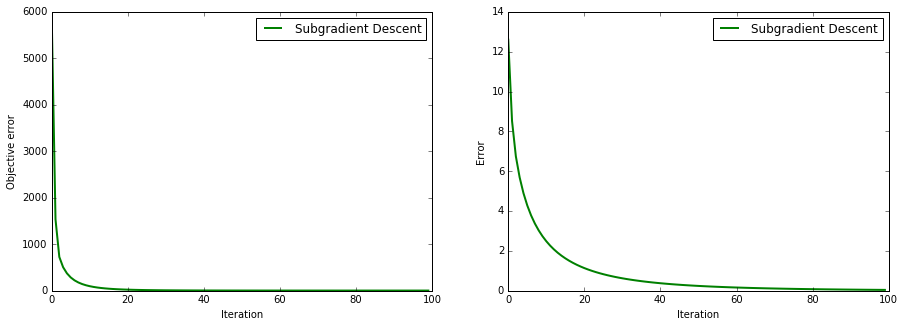

In [13]:
## Plot objective error and estimation error vs. iterations
max_iter, lamda = 100, 1/sqrt(N)
error_SD, obj_SD, w = SD(X, y, beta_0, max_iter, lamda)
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(t, obj_SD, 'g', linewidth = 2, label = 'Subgradient Descent')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.subplot(122)
plt.plot(t, error_SD, 'g', linewidth = 2, label = 'Subgradient Descent')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Error')

In [14]:
## Subgradient Descent
def MOM_SD(X, y, beta_0, K = 3, max_iter=100, lamda = 1,  gamma = 0.01):
    dim = X.shape[1]
    x, x_prime = np.matrix([0.0]*dim).T, np.matrix([0.0]*dim).T
    mom_obj_SD = []
    mom_error_SD = []
    print("Lauching MOM-SD solver...")
    for t in range(0, max_iter):
        Xk, yk = block(X, y, x, x_prime, K)
        x = x - gamma * subgrad(Xk, yk, x, lamda)/np.sqrt(t+1)
        Xk, yk = block(X, y, x, x_prime, K)
        x_prime = x_prime - gamma * subgrad(Xk, yk, x_prime, lamda)/np.sqrt(t+1) 
        mom_obj_SD.append(mom_obj(X, y, x, x_prime, lamda))
        mom_error_SD.append(norm(beta_0-x))
    return mom_error_SD, mom_obj_SD, x

Lauching MOM-SD solver...


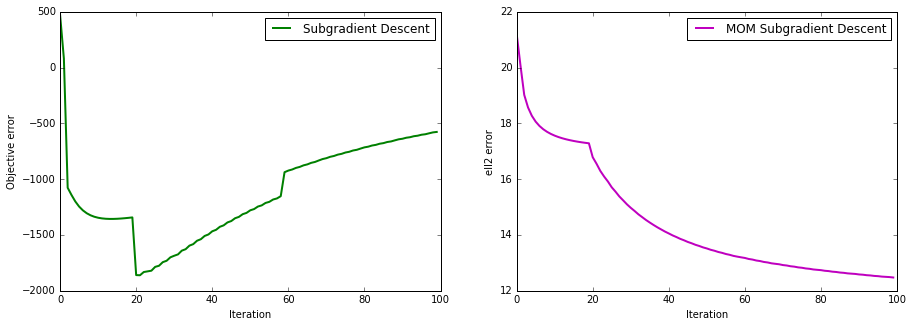

In [15]:
## Plot objective error and estimation error vs. iterations
K, max_iter, lamda = 8, 100, 1/sqrt(N)
mom_error_SD, mom_obj_SD, x = MOM_SD(X, y, beta_0, K, max_iter, lamda)
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(t, np.array(mom_obj_SD)-opt, 'g', linewidth = 2, label = 'Subgradient Descent')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.subplot(122)
plt.plot(t, mom_error_SD, 'm', linewidth = 2, label = 'MOM Subgradient Descent')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('ell2 error')

## Algorithm 0: Gradient Descent for Nesterov's Smoothing

In [16]:
# Nesterov's Smoothing
def SM(X, y, beta_0, max_iter=100, lamda = 1,  smoothness = 0.01):
    dim = X.shape[1]
    w = np.matrix([0.0]*dim).T
    L = (np.linalg.svd(X)[1][0])**2
    obj_SM = []
    error_SM = []
    print("Lauching SM solver...")
    for t in range(0, max_iter): 
        w = w - smooth_grad(X, y, w, smoothness, lamda)/(L + lamda/smoothness)
        error_SM.append(norm(beta_0-w))
        obj_SM.append(obj(X, y, w, lamda))
    return error_SM, obj_SM, w

Lauching SM solver...


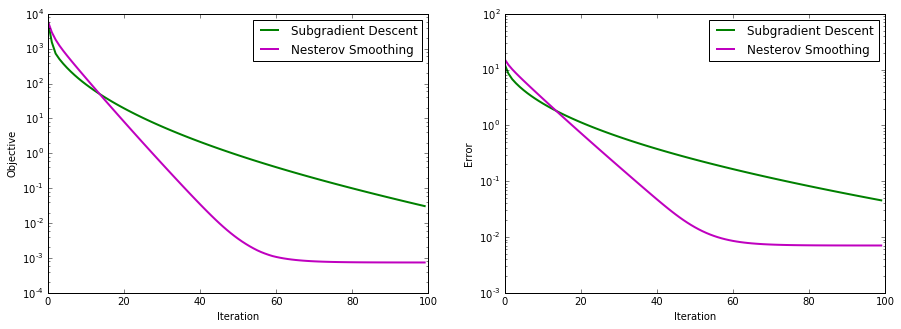

In [17]:
## Plot objective error and estimation error vs. iterations
max_iter, lamda = 100, 1/sqrt(N)
error_SM, obj_SM, w = SM(X, y, beta_0, max_iter, lamda)
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.semilogy(t, np.array(obj_SD)-opt, 'g', linewidth = 2, label = 'Subgradient Descent')
plt.semilogy(t, np.array(obj_SM)-opt, 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Objective')
plt.subplot(122)
plt.semilogy(t, np.array(error_SD), 'g', linewidth = 2, label = 'Subgradient Descent')
plt.semilogy(t, np.array(error_SM), 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Error')

In [18]:
# MOM Nesterov's Smoothing
def MOM_SM(X, y, beta_0, K = 3, max_iter=100, lamda = 1, smoothness = 0.01):
    dim = X.shape[1]
    x, x_prime = np.matrix([0.0]*dim).T, np.matrix([0.0]*dim).T
    L = (np.linalg.svd(X)[1][0])**2
    mom_obj_SM, mom_error_SM = [], []
    print("Lauching MOM-SM solver...")
    for t in range(0, max_iter):
        # descent in x
        Xk, yk = block(X, y, x, x_prime, K)
        L = linalg.norm(Xk)**2
        x = x - smooth_grad(Xk, yk, x, smoothness, lamda)/(L + lamda/smoothness)
        # ascent in y
        Xk, yk = block(X, y, x, x_prime, K)
        L = linalg.norm(Xk)**2
        x_prime = x_prime - smooth_grad(Xk, yk, x_prime, smoothness, lamda)/(L + lamda/smoothness)
        mom_error_SM.append(norm(beta_0-x))
        mom_obj_SM.append(mom_obj(X, y, x, x_prime, lamda))
    return mom_error_SM, mom_obj_SM, x

Lauching MOM-SM solver...


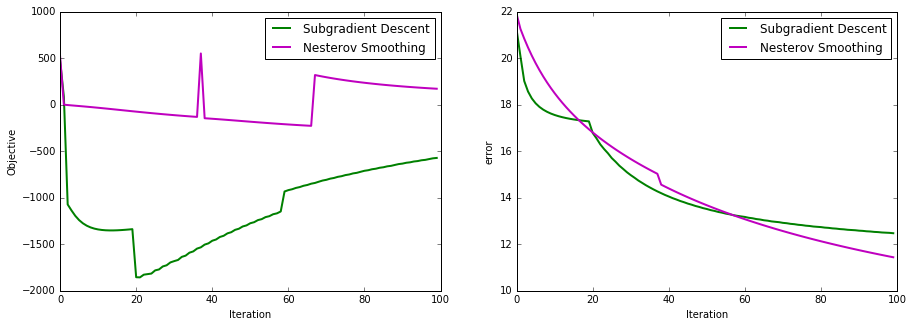

In [19]:
## Plot objective error vs. iterations
K, max_iter, lamda = 3, 100, 1/sqrt(N)
mom_error_SM, mom_obj_SM, x = MOM_SM(X, y, beta_0, K,  max_iter, lamda)
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(t, np.array(mom_obj_SD), 'g', linewidth = 2, label = 'Subgradient Descent')
plt.plot(t, np.array(mom_obj_SM), 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Objective')
plt.subplot(122)
plt.plot(t, np.array(mom_error_SD), 'g', linewidth = 2, label = 'Subgradient Descent')
plt.plot(t, np.array(mom_error_SM), 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('error')

# Algorithm 1: proximal gradient descent (aka ISTA)
For the **LASSO**: we initialize the algorithm with some $x_0 = 0\in\bR^d$ and perform the following iterations
\begin{equation}
x_{l+1} = {\rm prox}_{\lambda \norm{\cdot}_1}\left( x_l + \eta_l \bX^\top(\bY-\bX x_l) \right)
\end{equation}where ${\rm prox}_{\lambda \norm{\cdot}_1}$ is the proximal operator of $\lambda \norm{\cdot}_1$ that is the soft thresholding operator
\begin{equation}
{\rm prox}_{\lambda \norm{\cdot}_1}(z) = \left(sgn(z_j)(|z_j|-\lambda)I(|z_j|\geq \lambda)\right)_{j=1}^d.
\end{equation}

For the **MOM-LASSO**: given $K$ the number of blocks and a couple $(x_0, x_0^\prime)$ of points in $\bR^d$ for initialization, we perform the following alternating proximal gradient descent iterations : (at step $l$)
1. find $k\in[K]$ such that ${\rm MOM}_K(\ell_{x_l}-\ell_{x_l^\prime}) = P_{B_k}(\ell_{x_l}-\ell_{x_l^\prime})$
2. a proximal gradient descent in $x$: $$x_{l+1} = {\rm prox}_{\lambda \norm{\cdot}_1}\left( x_l + \eta_l \bX_k^\top(\bY_k-\bX_k x_l) \right)$$
3. find $k^\prime\in[K]$ such that ${\rm MOM}_K(\ell_{x_{l+1}}-\ell_{x_l^\prime}) = P_{B_{k^\prime}}(\ell_{x_{l+1}}-\ell_{x_l^\prime})$
4. a proximal gradient ascent in $x^\prime$:
$$x_{l+1}^\prime = {\rm prox}_{\lambda \norm{\cdot}_1}\left( x_l^\prime + \eta_l \bX_{k^\prime}^\top(\bY_{k^\prime}-\bX_{k^\prime} x_l^\prime) \right)$$
where $\bY_k=(Y_i)_{i\in B_k}$ and $\bX_k$ is the $|B_k|\times d$ matrix whose rows vectors are the $X_i$ for $i\in B_k$.



In [20]:
## Proximal Gradient 
def PG(X, y, beta_0, max_iter=100, lamda = 1):
    dim = X.shape[1]
    w = np.matrix([0.0]*dim).T
    obj_PG, error_PG = [], []
    L = (np.linalg.svd(X)[1][0])**2
    print("Lauching PG solver...")
    for t in range(0, max_iter):
        w = w - (1/L)* f_grad(X, y, w)
        w= soft_threshod(w, lamda/L)
        obj_PG.append(obj(X, y, w, lamda))
        error_PG.append(norm(beta_0-w))
    return error_PG, obj_PG, w

Lauching PG solver...


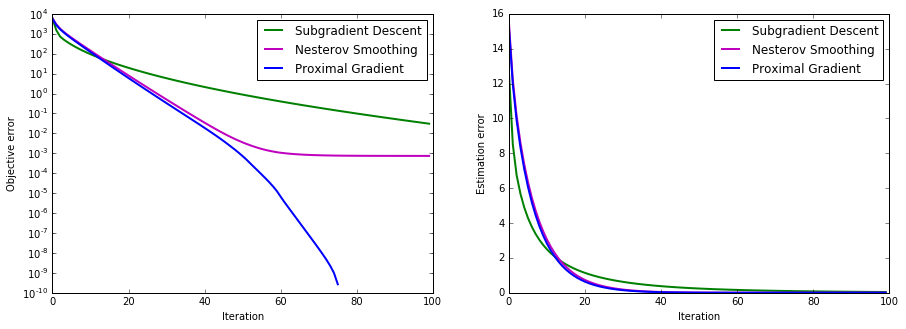

In [21]:
## Plot objective error vs. iteration (log scale)
max_iter, lamda = 100, 1/sqrt(N)
error_PG, obj_PG, w = PG(X, y, beta_0, max_iter, lamda)
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.semilogy(t, np.array(obj_SD)-opt, 'g', linewidth = 2, label = 'Subgradient Descent')
plt.semilogy(t, np.array(obj_SM)-opt, 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.semilogy(t, np.array(obj_PG)-opt, 'b', linewidth = 2, label = 'Proximal Gradient')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.subplot(122)
plt.plot(t, error_SD, 'g', linewidth = 2, label = 'Subgradient Descent')
plt.plot(t, error_SM, 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.plot(t, error_PG, 'b', linewidth = 2, label = 'Proximal Gradient')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Estimation error')

In [22]:
## MOM Proximal Gradient 
def MOM_PG(X, y, beta_0, K=3, max_iter=100, lamda = 1):
    dim = X.shape[1]
    x, x_prime = np.matrix([0.0]*dim).T, np.matrix([0.0]*dim).T
    mom_obj_PG, mom_error_PG = [], []
    print("Lauching MOM-PG solver...")
    for t in range(0, max_iter):
        Xk, yk = block(X, y, x, x_prime, K)
        L = linalg.norm(Xk) ** 2
        x = x - (1/L)* f_grad(Xk, yk, x)
        x= soft_threshod(x, lamda/L)
        Xk, yk = block(X, y, x, x_prime, K)
        L = linalg.norm(Xk) ** 2
        x_prime = x_prime - (1/L)* f_grad(Xk, yk, x_prime)
        x_prime = soft_threshod(x_prime, lamda/L)
        mom_error_PG.append(norm(beta_0-x))
        mom_obj_PG.append(mom_obj(X, y, x, x_prime, lamda))
    return mom_error_PG, mom_obj_PG, x

Lauching MOM-PG solver...


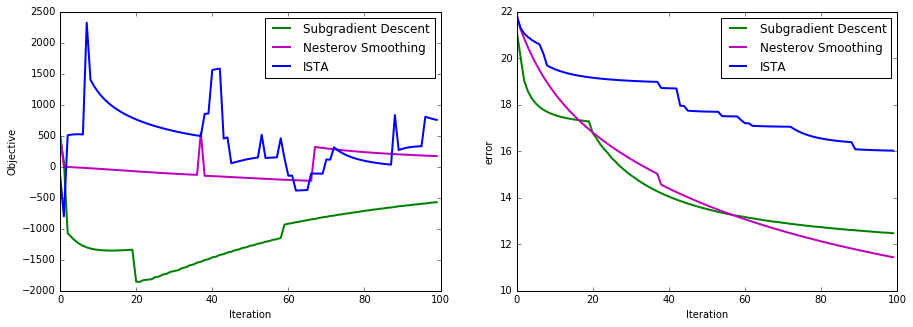

In [23]:
## Plot objective error vs. iteration (log scale)
K, max_iter, lamda = 10, 100, 1/sqrt(N)
mom_error_PG, mom_obj_PG, x = MOM_PG(X, y, beta_0, K, max_iter, lamda)
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(t, np.array(mom_obj_SD), 'g', linewidth = 2, label = 'Subgradient Descent')
plt.plot(t, np.array(mom_obj_SM), 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.plot(t, np.array(mom_obj_PG), 'b', linewidth = 2, label = 'ISTA')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Objective')
plt.subplot(122)
plt.plot(t, np.array(mom_error_SD), 'g', linewidth = 2, label = 'Subgradient Descent')
plt.plot(t, np.array(mom_error_SM), 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.plot(t, np.array(mom_error_PG), 'b', linewidth = 2, label = 'ISTA')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('error')

**CCL:** Nesterov smoothing and ISTA have similar properties for both the LASSO and MOM-LASSO

## ISTA with backtracking line search

In [24]:
## Proximal Gadient with Line Search
def PG_LS(X, y, beta_0, max_iter=100, lamda = 1):
    dim = X.shape[1]
    w = np.matrix([0.0]*dim).T
    obj_PG_LS, error_PG_LS = [], []
    LL = 1
    gamma = 1/LL
    beta = 1.2
    print("Lauching PG-LS solver...")
    for t in range(0, max_iter):
        w_prev = w
        delta = 1
        obj_val = obj(X, y, w, lamda)
        while (delta>1e-3):
            gamma = 1/LL
            w = w_prev - gamma * f_grad(X, y, w_prev)    
            w = soft_threshod(w,lamda * gamma)
            delta = obj(X, y, w, lamda) - obj_val - f_grad(X, y, w_prev).T*(w-w_prev)- (LL/2) * np.linalg.norm(w-w_prev)**2
            LL = LL*beta
        LL = LL/beta   

        obj_PG_LS.append(obj(X, y, w, lamda))
        error_PG_LS.append(norm(beta_0-w))
    return error_PG_LS, obj_PG_LS, w

Lauching PG-LS solver...


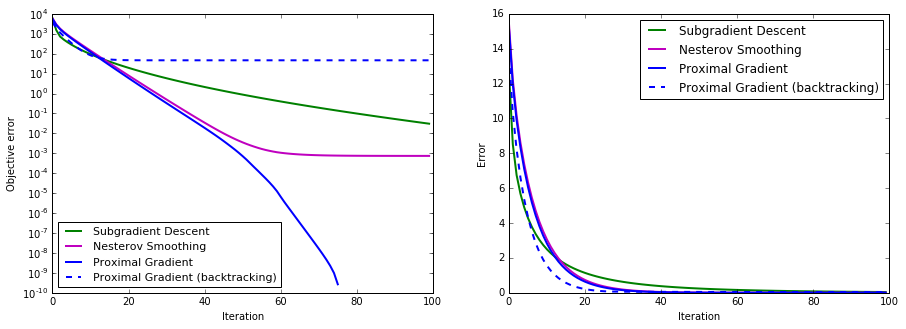

In [25]:
## Plot objective error vs. iteration (log scale)
error_PG_LS, obj_PG_LS, w = PG_LS(X, y, beta_0)
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.semilogy(t, np.array(obj_SD)-opt, 'g', linewidth = 2, label = 'Subgradient Descent')
plt.semilogy(t, np.array(obj_SM)-opt, 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.semilogy(t, np.array(obj_PG)-opt, 'b', linewidth = 2, label = 'Proximal Gradient')
plt.semilogy(t, np.array(obj_PG_LS)-opt, 'b--', linewidth = 2, label = 'Proximal Gradient (backtracking)')
plt.legend(prop={'size':11}, loc=3)
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.subplot(122)
plt.plot(t, np.array(error_SD), 'g', linewidth = 2, label = 'Subgradient Descent')
plt.plot(t, np.array(error_SM), 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.plot(t, np.array(error_PG), 'b', linewidth = 2, label = 'Proximal Gradient')
plt.plot(t, np.array(error_PG_LS), 'b--', linewidth = 2, label = 'Proximal Gradient (backtracking)')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Error')

In [26]:
## MOM Proximal Gradient with Line Search
def MOM_PG_LS(X, y, beta_0, K = 3, max_iter = 100, lamda = 1):
    dim = X.shape[1]
    x, x_prime = np.matrix([0.0]*dim).T, np.matrix([0.0]*dim).T
    mom_obj_PG_LS = []
    mom_error_PG_LS = []
    beta = 1.2
    print("Lauching MOM-PG-LS solver...")
    for t in range(0, max_iter):
        x_prev = x
        delta = 1
        Xk, yk = block(X, y, x, x_prime, K)
        obj_val = obj(Xk, yk, x, lamda)
        LL = 1
        while (delta>1e-3):
            gamma = 1/LL
            x = x_prev - gamma * f_grad(Xk, yk, x_prev)    
            x = soft_threshod(x, lamda * gamma)
            delta = obj(Xk, yk, x, lamda) - obj_val - f_grad(Xk, yk, x_prev).T*(x-x_prev)- (LL/2) * np.linalg.norm(x-x_prev)**2
            LL = LL*beta
        x_prime_prev = x_prime
        delta_prime = 1
        Xk, yk = block(X, y, x, x_prime, K)
        obj_val = obj(Xk, yk, x_prime, lamda)
        LL_prime = 1
        while (delta_prime>1e-3):
            gamma = 1/LL_prime
            x_prime = x_prime_prev - gamma * f_grad(Xk, yk, x_prime_prev)    
            x_prime = soft_threshod(x_prime, lamda * gamma)
            delta_prime = obj(Xk, yk, x_prime, lamda) - obj_val - f_grad(Xk, yk, x_prime_prev).T*(x_prime-x_prime_prev)- (LL_prime/2) * np.linalg.norm(x_prime-x_prime_prev)**2
            LL_prime = LL_prime*beta


        mom_obj_PG_LS.append(mom_obj(X, y, x, x_prime, lamda))
        mom_error_PG_LS.append(norm(beta_0-x))
    return mom_error_PG_LS, mom_obj_PG_LS, x

Lauching MOM-PG-LS solver...


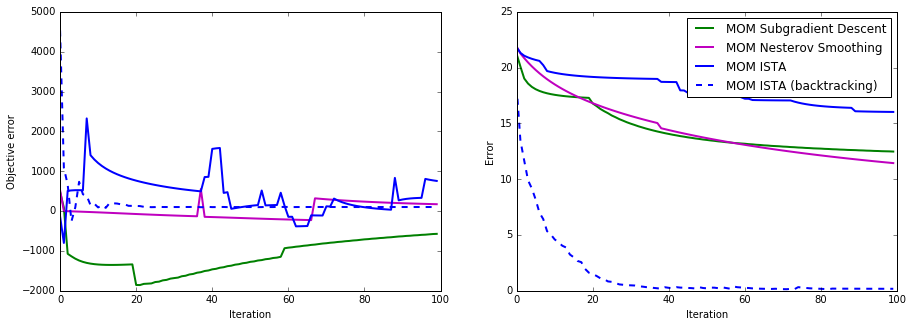

In [27]:
## Plot objective error vs. iteration (log scale)
mom_error_PG_LS, mom_obj_PG_LS, x = MOM_PG_LS(X, y, beta_0)
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(t, np.array(mom_obj_SD), 'g', linewidth = 2, label = 'MOM Subgradient Descent')
plt.plot(t, np.array(mom_obj_SM), 'm', linewidth = 2, label = 'MOM Nesterov Smoothing')
plt.plot(t, np.array(mom_obj_PG), 'b', linewidth = 2, label = 'MOM ISTA')
plt.plot(t, np.array(mom_obj_PG_LS), 'b--', linewidth = 2, label = 'MOM ISTA (backtracking)')
#plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.subplot(122)
plt.plot(t, np.array(mom_error_SD), 'g', linewidth = 2, label = 'MOM Subgradient Descent')
plt.plot(t, np.array(mom_error_SM), 'm', linewidth = 2, label = 'MOM Nesterov Smoothing')
plt.plot(t, np.array(mom_error_PG), 'b', linewidth = 2, label = 'MOM ISTA')
plt.plot(t, np.array(mom_error_PG_LS), 'b--', linewidth = 2, label = 'MOM ISTA (backtracking)')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Error')

## Acceleration: FISTA

In [28]:
## Nesterovs' Accelerated Proximal Gradient
def APG(X, y, beta_0, max_iter = 100, lamda = 1):
    dim = X.shape[1]
    w = np.matrix([0.0]*dim).T
    v = w
    obj_APG, error_APG = [], []
    L = (np.linalg.svd(X)[1][0])**2
    gamma = 1/L
    print("Lauching APG solver...")
    for t in range(0, max_iter):
        w_prev = w
        w = v - gamma * f_grad(X, y, v)
        w = soft_threshod(w, lamda * gamma)
        v = w + t/(t+3) * (w - w_prev)

        obj_APG.append(obj(X, y, w, lamda))
        error_APG.append(norm(beta_0-w))
    return error_APG, obj_APG, w

Lauching APG solver...


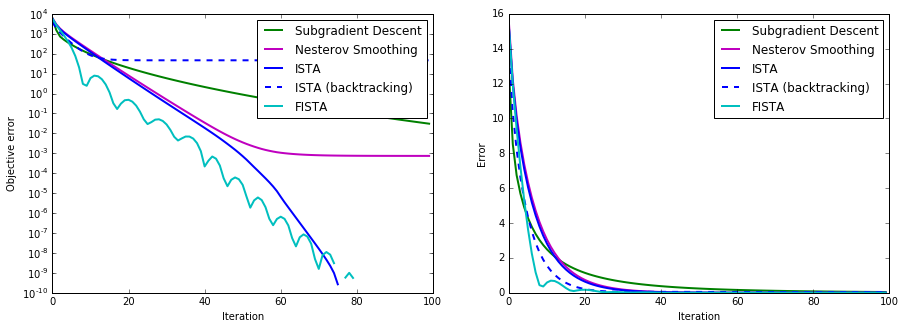

In [29]:
## Plot objective error vs. iteration (log scale)
max_iter, lamda = 100 , 1/sqrt(N)
error_APG, obj_APG, w = APG(X, y, beta_0, max_iter, lamda)
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.semilogy(t, np.array(obj_SD)-opt, 'g', linewidth = 2, label = 'Subgradient Descent')
plt.semilogy(t, np.array(obj_SM)-opt, 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.semilogy(t, np.array(obj_PG)-opt, 'b', linewidth = 2, label = 'ISTA')
plt.semilogy(t, np.array(obj_PG_LS)-opt, 'b--', linewidth = 2, label = 'ISTA (backtracking)')
plt.semilogy(t, np.array(obj_APG)-opt, 'c', linewidth = 2, label = 'FISTA')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.subplot(122)
plt.plot(t, np.array(error_SD), 'g', linewidth = 2, label = 'Subgradient Descent')
plt.plot(t, np.array(error_SM), 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.plot(t, np.array(error_PG), 'b', linewidth = 2, label = 'ISTA')
plt.plot(t, np.array(error_PG_LS), 'b--', linewidth = 2, label = 'ISTA (backtracking)')
plt.plot(t, np.array(error_APG), 'c', linewidth = 2, label = 'FISTA')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Error')

In [30]:
## MOM Nesterovs' Accelerated Proximal Gradient
def MOM_APG(X, y, beta_0, K=3, max_iter=100, lamda = 1):
    dim = X.shape[1]
    x, x_prime = np.matrix([0.0]*dim).T, np.matrix([0.0]*dim).T
    v, v_prime = x, x_prime
    mom_obj_APG = []
    mom_error_APG = []
    print("Lauching MOM-APG solver...")
    for t in range(0, max_iter):
        Xk, yk = block(X, y, x, x_prime, K)
        L = linalg.norm(Xk) ** 2
        gamma = 1/L
        x_prev = x
        x = v - gamma*f_grad(Xk, yk, v)
        x = soft_threshod(x, lamda*gamma)
        v = x + t/(t+3) * (x - x_prev)
        Xk, yk = block(X, y, x, x_prime, K)
        L = linalg.norm(Xk) ** 2
        gamma = 1/L
        x_prev_prime = x_prime
        x_prime = v_prime - gamma * f_grad(Xk, yk, v_prime)
        x_prime = soft_threshod(x_prime, lamda * gamma)
        v_prime = x_prime + t/(t+3) * (x_prime - x_prev_prime)
        #print(mom_obj(x, x_prime))

        mom_obj_APG.append(mom_obj(X, y, x, x_prime, lamda))
        mom_error_APG.append(norm(beta_0-x))
    return mom_error_APG, mom_obj_APG, x

Lauching MOM-APG solver...


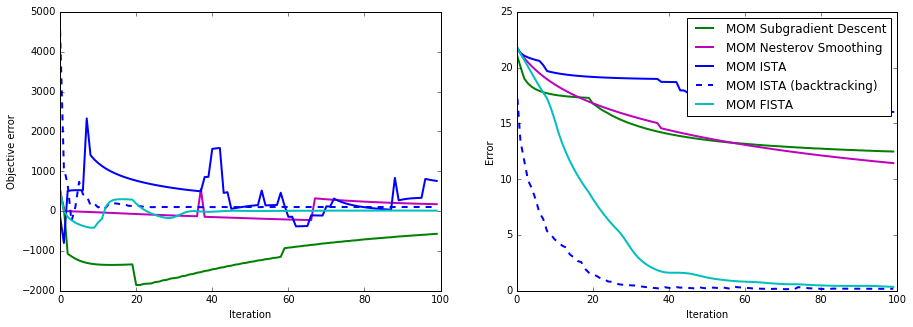

In [31]:
## Plot objective error vs. iteration (log scale)
K, max_iter, lamda = 3, 100, 1/sqrt(N)
mom_error_APG, mom_obj_APG, x = MOM_APG(X, y, beta_0, K, max_iter, lamda)
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(t, np.array(mom_obj_SD), 'g', linewidth = 2, label = 'MOM Subgradient Descent')
plt.plot(t, np.array(mom_obj_SM), 'm', linewidth = 2, label = 'MOM Nesterov Smoothing')
plt.plot(t, np.array(mom_obj_PG), 'b', linewidth = 2, label = 'MOM ISTA')
plt.plot(t, np.array(mom_obj_PG_LS), 'b--', linewidth = 2, label = 'MOM ISTA (backtracking)')
plt.plot(t, np.array(mom_obj_APG), 'c', linewidth = 2, label = 'MOM FISTA')
#plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.subplot(122)
plt.plot(t, np.array(mom_error_SD), 'g', linewidth = 2, label = 'MOM Subgradient Descent')
plt.plot(t, np.array(mom_error_SM), 'm', linewidth = 2, label = 'MOM Nesterov Smoothing')
plt.plot(t, np.array(mom_error_PG), 'b', linewidth = 2, label = 'MOM ISTA')
plt.plot(t, np.array(mom_error_PG_LS), 'b--', linewidth = 2, label = 'MOM ISTA (backtracking)')
plt.plot(t, np.array(mom_error_APG), 'c', linewidth = 2, label = 'MOM FISTA')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Error')

**CCL:** Some algorithms (not always the same) achieve a value of 0 for the objective function (meaning that we have a saddle point). 

## FISTA with backtracking line search

In [32]:
## Nesterovs' Accelerated Proximal Gradient with Backtracking
def APG_LS(X, y, beta_0, max_iter=100, lamda = 1):
    dim = X.shape[1]
    w = np.matrix([0.0]*dim).T
    v = w
    obj_APG_LS, error_APG_LS = [], []
    L=1
    #gamma = 1/L
    beta = 1.2
    print("Lauching APG-LS solver...")
    for t in range(0, max_iter):
        obj_val = obj(X, y, w, lamda)
        w_prev = w
        delta = 1
        #L=1
        while (delta>1e-3):
            #print(t, L, delta)
            gamma = 1/L
            w = v - gamma * f_grad(X, y, v)    
            w = soft_threshod(w,lamda * gamma)
            delta = obj(X, y, w, lamda) - obj_val - f_grad(X, y, w_prev).T*(w-w_prev)- (L/2) * np.linalg.norm(w-w_prev)**2
            L = L*beta
        L = L/beta    
        v = w + t/(t+3) * (w - w_prev)

        obj_APG_LS.append(obj_val.item())
        error_APG_LS.append(norm(beta_0-w))
    return error_APG_LS, obj_APG_LS, w

Lauching APG-LS solver...


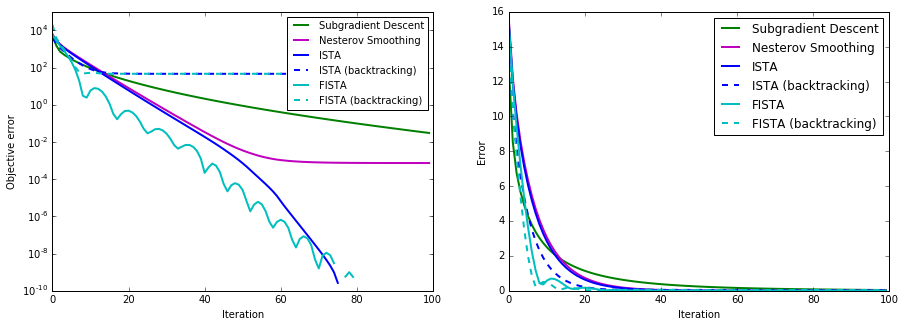

In [33]:
error_APG_LS, obj_APG_LS, w = APG_LS(X, y, beta_0)
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.semilogy(t, np.array(obj_SD)-opt, 'g', linewidth = 2, label = 'Subgradient Descent')
plt.semilogy(t, np.array(obj_SM)-opt, 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.semilogy(t, np.array(obj_PG)-opt, 'b', linewidth = 2, label = 'ISTA')
plt.semilogy(t, np.array(obj_PG_LS)-opt, 'b--', linewidth = 2, label = 'ISTA (backtracking)')
plt.semilogy(t, np.array(obj_APG)-opt, 'c', linewidth = 2, label = 'FISTA')
plt.semilogy(t, np.array(obj_APG_LS)-opt, 'c--', linewidth = 2, label = 'FISTA (backtracking)')
plt.legend(prop={'size':10})
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.subplot(122)
plt.plot(t, np.array(error_SD), 'g', linewidth = 2, label = 'Subgradient Descent')
plt.plot(t, np.array(error_SM), 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.plot(t, np.array(error_PG), 'b', linewidth = 2, label = 'ISTA')
plt.plot(t, np.array(error_PG_LS), 'b--', linewidth = 2, label = 'ISTA (backtracking)')
plt.plot(t, np.array(error_APG), 'c', linewidth = 2, label = 'FISTA')
plt.plot(t, np.array(error_APG_LS), 'c--', linewidth = 2, label = 'FISTA (backtracking)')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Error')

In [34]:
## MOM Nesterovs' Accelerated Proximal Gradient with Backtracking
def MOM_APG_LS(X, y, beta_0, K=3, max_iter=100, lamda = 1):
    dim = X.shape[1]
    x, x_prime = np.matrix([0.0]*dim).T, np.matrix([0.0]*dim).T
    v, v_prime = x, x_prime
    mom_obj_APG_LS, mom_error_APG_LS = [], []
    beta = 1.2
    print("Lauching MOM-APG-LS solver...")
    for t in range(0, max_iter):
        x_prev = x
        delta = 1
        Xk, yk = block(X, y, x, x_prime, K)
        obj_val = obj(Xk, yk, x, lamda)
        L = linalg.norm(Xk) ** 2
        while (delta>1e-3):
            gamma = 1/L
            x = v - gamma * f_grad(Xk, yk, v)    
            x = soft_threshod(x, lamda * gamma)
            delta = obj(Xk, yk, x, lamda) - obj_val - f_grad(Xk, yk, x_prev).T*(x-x_prev)- (L/2) * np.linalg.norm(x-x_prev)**2
            L = L*beta
        L = L/beta    
        v = x + t/(t+3) * (x - x_prev)
        #ascent
        x_prev_prime = x_prime
        delta_prime = 1
        Xk, yk = block(X, y, x, x_prime, K)
        obj_val_prime = obj(Xk, yk, x_prime, lamda)
        L_prime = linalg.norm(Xk) ** 2
        while (delta_prime>1e-3):
            gamma_prime = 1/L_prime
            x_prime = v_prime - gamma_prime * f_grad(Xk, yk, v_prime)    
            x_prime = soft_threshod(x_prime, lamda * gamma_prime)
            delta_prime = obj(Xk, yk, x_prime, lamda) - obj_val_prime - f_grad(Xk, yk, x_prev_prime).T*(x_prime-x_prev_prime) - (L_prime/2) * np.linalg.norm(x_prime-x_prev_prime)**2
            L_prime = L_prime*beta
        L_prime = L_prime/beta    
        v_prime = x_prime + t/(t+3) * (x_prime - x_prev_prime)

        mom_obj_APG_LS.append(mom_obj(X, y, x, x_prime, lamda))
        mom_error_APG_LS.append(norm(beta_0-x))
    return mom_error_APG_LS, mom_obj_APG_LS, x

Lauching MOM-APG-LS solver...


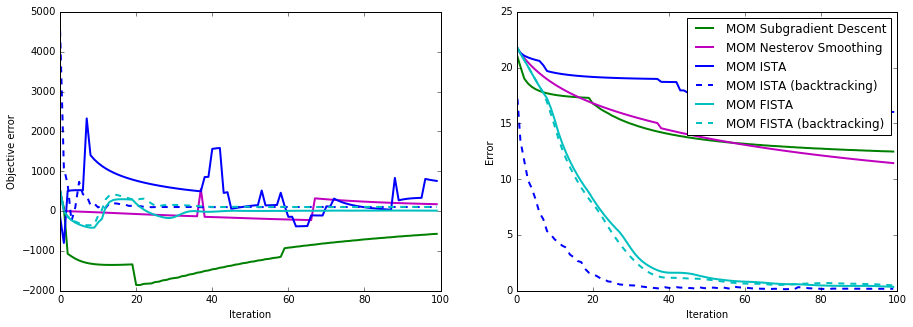

In [35]:
mom_error_APG_LS, mom_obj_APG_LS, x = MOM_APG_LS(X, y, beta_0)
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(t, np.array(mom_obj_SD), 'g', linewidth = 2, label = 'MOM Subgradient Descent')
plt.plot(t, np.array(mom_obj_SM), 'm', linewidth = 2, label = 'MOM Nesterov Smoothing')
plt.plot(t, np.array(mom_obj_PG), 'b', linewidth = 2, label = 'MOM ISTA')
plt.plot(t, np.array(mom_obj_PG_LS), 'b--', linewidth = 2, label = 'MOM ISTA (backtracking)')
plt.plot(t, np.array(mom_obj_APG), 'c', linewidth = 2, label = 'MOM FISTA')
plt.plot(t, np.array(mom_obj_APG_LS), 'c--', linewidth = 2, label = 'MOM FISTA (backtracking)')
#plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.subplot(122)
plt.plot(t, np.array(mom_error_SD), 'g', linewidth = 2, label = 'MOM Subgradient Descent')
plt.plot(t, np.array(mom_error_SM), 'm', linewidth = 2, label = 'MOM Nesterov Smoothing')
plt.plot(t, np.array(mom_error_PG), 'b', linewidth = 2, label = 'MOM ISTA')
plt.plot(t, np.array(mom_error_PG_LS), 'b--', linewidth = 2, label = 'MOM ISTA (backtracking)')
plt.plot(t, np.array(mom_error_APG), 'c', linewidth = 2, label = 'MOM FISTA')
plt.plot(t, np.array(mom_error_APG_LS), 'c--', linewidth = 2, label = 'MOM FISTA (backtracking)')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Error')

**CCL:** On that example, MOM FISTA with backtracking LS does not improve the MOM FISTA

## Douglas-Rachford / ADMM

In [36]:
## ADMM
def ADMM(X, y, beta_0, max_iter, lamda):
    dim = X.shape[1]
    w = np.matrix([0.0]*dim).T
    z = w
    u = w
    obj_ADMM, error_ADMM = [], []
    rho = 5
    #print("Lauching ADMM solver...")
    for t in range(0, max_iter):
        #if (t%100==0):
        #    print('iter= {}, estimation error ADMM = {:3f}'.format(t, norm(beta_0 - w)))
        w = np.linalg.solve((X.T)*X + rho*np.identity(dim), X.T*y + rho*z - u)
        z = soft_threshod(w + u/rho, lamda/rho)
        u = u + rho * (w-z)
        
        obj_ADMM.append(obj(X, y, w, lamda))
        error_ADMM.append(norm(beta_0 - w))
    return error_ADMM, obj_ADMM, w

In [37]:
max_iter, lamda = 100, 1/sqrt(N)
error_ADMM, obj_ADMM, w = ADMM(X, y, beta_0, max_iter, lamda)

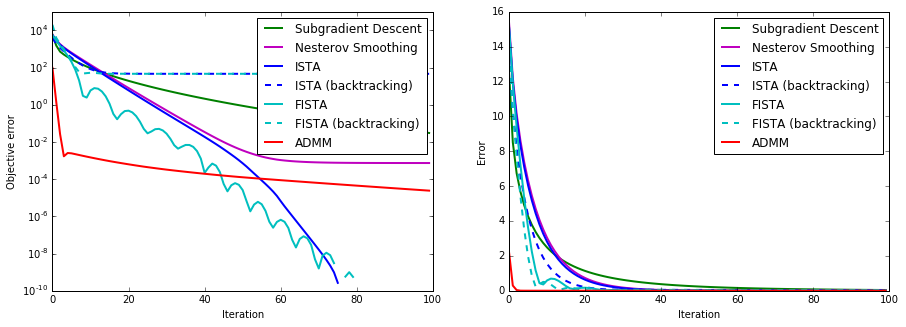

In [38]:
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.semilogy(t, np.array(obj_SD)-opt, 'g', linewidth = 2, label = 'Subgradient Descent')
plt.semilogy(t, np.array(obj_SM)-opt, 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.semilogy(t, np.array(obj_PG)-opt, 'b', linewidth = 2, label = 'ISTA')
plt.semilogy(t, np.array(obj_PG_LS)-opt, 'b--', linewidth = 2, label = 'ISTA (backtracking)')
plt.semilogy(t, np.array(obj_APG)-opt, 'c', linewidth = 2, label = 'FISTA')
plt.semilogy(t, np.array(obj_APG_LS)-opt, 'c--', linewidth = 2, label = 'FISTA (backtracking)')
plt.semilogy(t, np.array(obj_ADMM)-opt, 'r', linewidth = 2, label = 'ADMM')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.subplot(122)
plt.plot(t, np.array(error_SD), 'g', linewidth = 2, label = 'Subgradient Descent')
plt.plot(t, np.array(error_SM), 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.plot(t, np.array(error_PG), 'b', linewidth = 2, label = 'ISTA')
plt.plot(t, np.array(error_PG_LS), 'b--', linewidth = 2, label = 'ISTA (backtracking)')
plt.plot(t, np.array(error_APG), 'c', linewidth = 2, label = 'FISTA')
plt.plot(t, np.array(error_APG_LS), 'c--', linewidth = 2, label = 'FISTA (backtracking)')
plt.plot(t, np.array(error_ADMM), 'r', linewidth = 2, label = 'ADMM')
plt.legend(prop={'size':12})
plt.xlabel('Iteration')
plt.ylabel('Error')

In [39]:
## MOM ADMM
def MOM_ADMM(X, y, beta_0, K=3, max_iter=100, lamda = 1):
    dim = X.shape[1]
    x, x_prime = np.matrix([0.0]*dim).T, np.matrix([0.0]*dim).T
    z, z_prime = x, x_prime
    u, u_prime = x, x_prime
    mom_obj_ADMM, mom_error_ADMM = [], []
    rho = 5
    #print("Lauching MOM-ADMM solver...")
    for t in range(0, max_iter):
        #if (t%100==0):
        #    print('iter= {}, estimation error MOM ADMM = {:3f}'.format(t, norm(beta_0 - x)))
        #descent
        Xk, yk = block(X, y, x, x_prime, K)
        x = np.linalg.solve((Xk.T)*Xk + rho*np.identity(dim), Xk.T*yk + rho*z - u)
        z = soft_threshod(x + u/rho, lamda/rho)
        u = u + rho * (x-z)
        #ascent
        Xk, yk = block(X, y, x, x_prime, K)
        x_prime = np.linalg.solve((Xk.T)*Xk + rho*np.identity(dim), Xk.T*yk + rho*z_prime - u_prime)
        z_prime = soft_threshod(x_prime + u_prime/rho, lamda/rho)
        u_prime = u_prime + rho * (x_prime-z_prime)

        mom_obj_ADMM.append(mom_obj(X, y, x, x_prime, lamda))
        mom_error_ADMM.append(norm(beta_0 - x))
    return mom_error_ADMM, mom_obj_ADMM, x

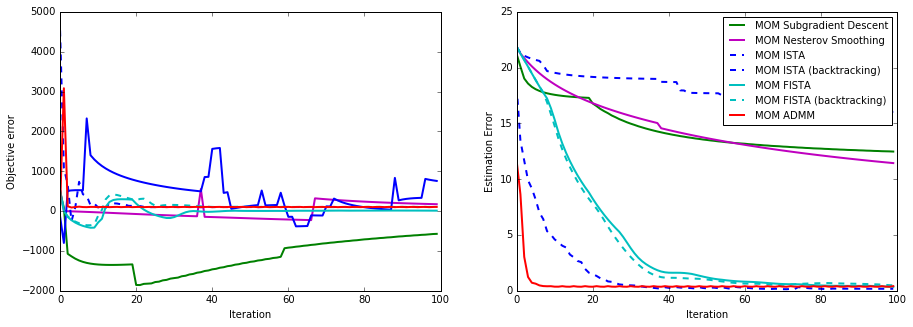

In [40]:
mom_error_ADMM, mom_obj_ADMM, x = MOM_ADMM(X, y, beta_0)
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(t, np.array(mom_obj_SD), 'g', linewidth = 2, label = 'MOM Subgradient Descent')
plt.plot(t, np.array(mom_obj_SM), 'm', linewidth = 2, label = 'MOM Nesterov Smoothing')
plt.plot(t, np.array(mom_obj_PG), 'b', linewidth = 2, label = 'MOM ISTA')
plt.plot(t, np.array(mom_obj_PG_LS), 'b--', linewidth = 2, label = 'MOM ISTA (backtracking)')
plt.plot(t, np.array(mom_obj_APG), 'c', linewidth = 2, label = 'MOM FISTA')
plt.plot(t, np.array(mom_obj_APG_LS), 'c--', linewidth = 2, label = 'MOM FISTA (backtracking)')
plt.plot(t, np.array(mom_obj_ADMM), 'r', linewidth = 2, label = 'MOM ADMM')
#plt.legend(prop={'size':10})
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.subplot(122)
plt.plot(t, np.array(mom_error_SD), 'g', linewidth = 2, label = 'MOM Subgradient Descent')
plt.plot(t, np.array(mom_error_SM), 'm', linewidth = 2, label = 'MOM Nesterov Smoothing')
plt.plot(t, np.array(mom_error_PG), 'b--', linewidth = 2, label = 'MOM ISTA')
plt.plot(t, np.array(mom_error_PG_LS), 'b--', linewidth = 2, label = 'MOM ISTA (backtracking)')
plt.plot(t, np.array(mom_error_APG), 'c', linewidth = 2, label = 'MOM FISTA')
plt.plot(t, np.array(mom_error_APG_LS), 'c--', linewidth = 2, label = 'MOM FISTA (backtracking)')
plt.plot(t, np.array(mom_error_ADMM), 'r', linewidth = 2, label = 'MOM ADMM')
plt.legend(prop={'size':10})
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')

## Conclusion: ADMM looks to have the best performances for both the LASSO and MOM LASSO

We will therefore use ADMM to compare the performances of the LASSO and MOM LASSO on corrupted datasets.

In [41]:
np.random.seed(50)
n_features, sparsity = 500, 10
beta_0 = beta_func(n_features, sparsity)
n_samples,  sigma = 200, 1
y, X = data1(n_samples, beta_0,  sigma)
beta_0 = np.matrix(beta_0).T
y = np.matrix(y).T
X = np.matrix(X)

In [42]:
K, max_iter, lamda = 3, 600, 1/sqrt(N)
error_ADMM, obj_ADMM, w = ADMM(X, y, beta_0, max_iter, lamda)
mom_error_ADMM, mom_obj_ADMM, x = MOM_ADMM(X, y, beta_0, K, max_iter, lamda)

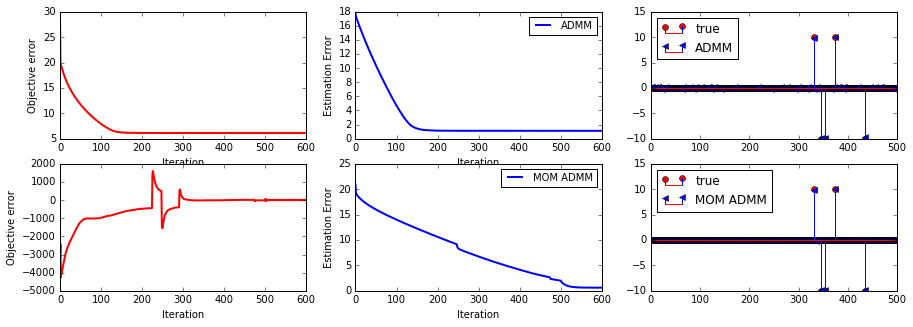

In [43]:
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(231)
plt.plot(t, np.array(obj_ADMM), 'r', linewidth = 2, label = 'ADMM')
#plt.legend(prop={'size':10})
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.subplot(232)
plt.plot(t, np.array(error_ADMM), 'b', linewidth = 2, label = 'ADMM')
plt.legend(prop={'size':10})
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.subplot(233)
plt.stem(beta_0, markerfmt='ro', label='true')
plt.stem(w, markerfmt='b<', label = 'ADMM')
plt.legend(loc=2)
plt.subplot(234)
plt.plot(t, np.array(mom_obj_ADMM), 'r', linewidth = 2, label = 'MOM ADMM')
#plt.legend(prop={'size':10})
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.subplot(235)
plt.plot(t, np.array(mom_error_ADMM), 'b', linewidth = 2, label = 'MOM ADMM')
plt.legend(prop={'size':10})
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.subplot(236)
plt.stem(beta_0, markerfmt='ro', label='true')
plt.stem(x, markerfmt='b<', label = 'MOM ADMM')
plt.legend(loc=2)

## Cyclic coordinate descent

In [44]:
def coord_descent(X, y, beta_0, max_iter=100, lamda = 1):
    n_samples, n_features = X.shape
    x = np.matrix([0.0]*n_features).T
    r = y - X*x
    errors, objectives = [], []
    print("")    
    print("Lauching CCD solver...")
    print(' | '.join([name.center(8) for name in ["it", "obj", "err"]]))
    for k in range(max_iter):
        if k%50 == 0:
                print("{} | {} | {}".format(k, obj(X, y, x, lamda), norm(beta_0-x)))
        for j in range(n_features):
            feature_j = X[:, j]
            r += feature_j * x[j]
            x_j = feature_j.T*r / norm(feature_j) ** 2
            abs_x_j = np.abs(x_j)
            lamda_norm = lamda /(norm(feature_j)*2)#We should devide by 2*norm(feature_j)**2 for the non-normalized LASSO
            x_j = np.sign(x_j) * (abs_x_j - lamda_norm) * (abs_x_j > lamda_norm)
            x[j] = x_j
            r -= feature_j * x[j]
        errors.append(norm(beta_0-x))
        objectives.append(obj(X, y, x, lamda))
    return  errors, objectives, x

In [45]:
np.random.seed(50)
n_features, sparsity = 500, 10
beta_0 = beta_func(n_features, sparsity)
n_samples,  sigma = 200, 1
y, X = data1(n_samples, beta_0,  sigma)
beta_0 = np.matrix(beta_0).T
y = np.matrix(y).T
X = np.matrix(X)
max_iter = 200
error_CCD, obj_CCD, x_CCD = coord_descent(X, y,beta_0, max_iter, lamda)
error_ADMM, obj_ADMM, x_ADMM = ADMM(X, y,beta_0, max_iter, lamda)


Lauching CCD solver...
   it    |   obj    |   err   
0 | 47516.63463437241 | 22.36067977499791
50 | 31.150675974295325 | 26.72272677595374
100 | 26.50936408731161 | 24.55904679606641
150 | 23.31748607301032 | 22.4669037627748


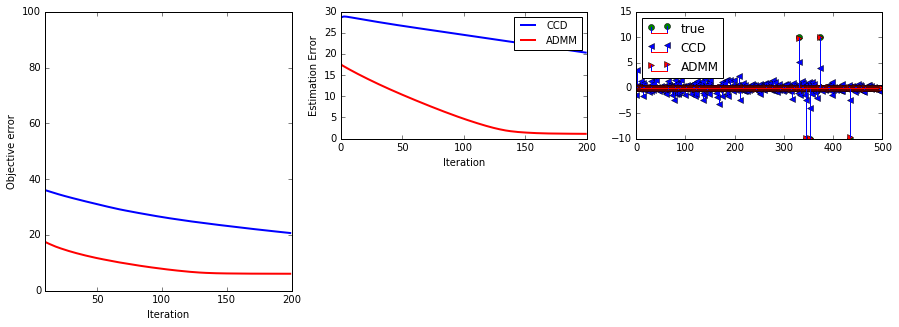

In [46]:
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(131)
plt.plot(t, np.array(obj_CCD), 'b', linewidth = 2, label = 'CCD')
plt.plot(t, np.array(obj_ADMM), 'r', linewidth = 2, label = 'ADMM')
plt.xlim(10, max_iter)
plt.ylim(0, 100)
#plt.legend(prop={'size':10})
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.subplot(232)
plt.plot(t, np.array(error_CCD), 'b', linewidth = 2, label = 'CCD')
plt.plot(t, np.array(error_ADMM), 'r', linewidth = 2, label = 'ADMM')
plt.legend(prop={'size':10})
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.subplot(233)
plt.stem(beta_0, markerfmt='go', label='true')
plt.stem(x_CCD, markerfmt='b<', label = 'CCD')
plt.stem(x_ADMM, markerfmt='r>', label = 'ADMM')
plt.legend(loc=2)

In [47]:
def MOM_coord_descent(X, y, beta_0, K = 3,  max_iter=100, lamda = 1):
    n_samples, n_features = X.shape
    x, x_prime = np.matrix([0.0]*n_features).T, np.matrix([0.0]*n_features).T
    errors, objectives = [], []
    print("")    
    print("Lauching MOM-CCD solver...")
    print(' | '.join([name.center(8) for name in ["it", "obj", "err"]]))
    for k in range(max_iter):
        if k%20 == 0:
                print("{} | {} | {}".format(k, obj(X, y, x, lamda), norm(beta_0-x)))
        Xk, yk = block(X, y, x, x_prime, K)
        r = yk - Xk*x
        for j in range(n_features):
            feature_j = Xk[:, j]
            r += feature_j * x[j]
            x_j = feature_j.T*r / norm(feature_j) ** 2
            abs_x_j = np.abs(x_j)
            lamda_norm = lamda /(norm(feature_j)*2)#We should divide by 2*norm(feature_j)**2 for the non-normalized LASSO
            x_j = np.sign(x_j) * (abs_x_j - lamda_norm) * (abs_x_j > lamda_norm)
            x[j] = x_j
            r -= feature_j * x[j]
        Xk, yk = block(X, y, x, x_prime, K)
        r_prime = yk - Xk*x_prime
        for j in range(n_features):
            feature_j = Xk[:, j]
            r_prime += feature_j * x_prime[j]
            x_j_prime = feature_j.T*r_prime / norm(feature_j) ** 2
            abs_x_j_prime = np.abs(x_j_prime)
            lamda_norm = lamda /(norm(feature_j)*2)#We should divide by 2*norm(feature_j)**2 for the non-normalized LASSO
            x_j_prime = np.sign(x_j_prime) * (abs_x_j_prime - lamda_norm) * (abs_x_j_prime > lamda_norm)
            x_prime[j] = x_j_prime
            r_prime -= feature_j * x_prime[j]
        errors.append(norm(beta_0-x))
        objectives.append(mom_obj(X, y, x, x_prime, lamda))
    return  errors, objectives, x

In [48]:
np.random.seed(50)
n_features, sparsity = 400, 10
beta_0 = beta_func(n_features, sparsity)
n_samples,  sigma = 200, 1
y, X = data1(n_samples, beta_0,  sigma)
beta_0 = np.matrix(beta_0).T
y = np.matrix(y).T
X = np.matrix(X)
K, max_iter, lamda = 10, 200, 1/sqrt(n_samples)
MOM_error_CCD, MOM_obj_CCD, MOM_x_CCD = MOM_coord_descent(X, y,beta_0, K, max_iter)
MOM_error_ADMM, MOM_obj_ADMM, MOM_x_ADMM = MOM_ADMM(X, y,beta_0, K, max_iter)


Lauching MOM-CCD solver...
   it    |   obj    |   err   
0 | 46699.22248601765 | 22.360679909364716
20 | 1798630.3185602918 | 147.39630638128338
40 | 98022915.21938586 | 1041.3143171376123
60 | 4443712389.302323 | 7794.892613861248
80 | 223100784540.6221 | 50572.36566758258
100 | 7703844077862.7 | 341390.30168448336
120 | 346538747650689.9 | 2163278.6031900197
140 | 9164002193701936.0 | 10493357.857137306
160 | 2.1319158051411747e+17 | 49521253.404505506
180 | 1.8382217607233047e+18 | 157506529.70506573


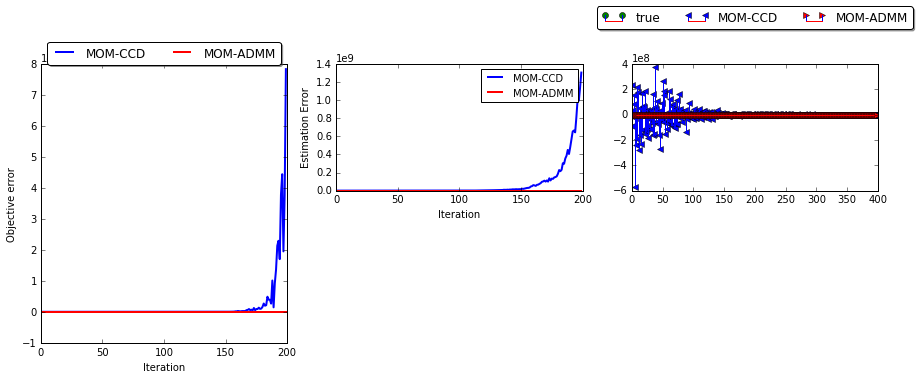

In [49]:
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(131)
plt.plot(t, np.array(MOM_obj_CCD), 'b', linewidth = 2, label = 'MOM-CCD')
plt.plot(t, np.array(MOM_obj_ADMM), 'r', linewidth = 2, label = 'MOM-ADMM')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4, fancybox=True, shadow=True)
#plt.xlim(10, max_iter)
#plt.ylim(0, 100)
#plt.legend(prop={'size':10})
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.subplot(232)
plt.plot(t, np.array(MOM_error_CCD), 'b', linewidth = 2, label = 'MOM-CCD')
plt.plot(t, np.array(MOM_error_ADMM), 'r', linewidth = 2, label = 'MOM-ADMM')
plt.legend(prop={'size':10})
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.subplot(233)
plt.stem(beta_0, markerfmt='go', label='true')
plt.stem(MOM_x_CCD, markerfmt='b<', label = 'MOM-CCD')
plt.stem(MOM_x_ADMM, markerfmt='r>', label = 'MOM-ADMM')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=4, fancybox=True, shadow=True)

# Final simulations

In [50]:
np.random.seed(50)
n_features, sparsity = 300, 20
beta_0 = beta_func(n_features, sparsity)
n_samples,  sigma = 200, 1
y, X = data1(n_samples, beta_0,  sigma)
beta_0 = np.matrix(beta_0).T
y = np.matrix(y).T
X = np.matrix(X)
K, max_iter, lamda = 10, 500, 1/sqrt(n_samples)

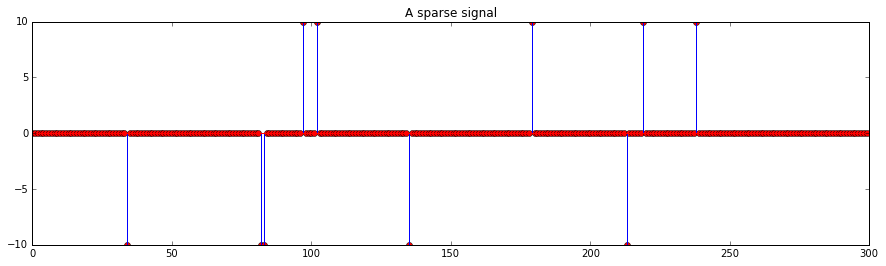

In [51]:
plt.figure(figsize = (15, 4))
plt.stem(beta_0, markerfmt='ro', label='true')
plt.title('A sparse signal')

In [52]:
error_SD, obj_SD, x_SD = SD(X, y, beta_0, max_iter, lamda)
error_SM, obj_SM, x_SM = SM(X, y, beta_0, max_iter, lamda)
error_PG, obj_PG, x_PG = PG(X, y, beta_0, max_iter, lamda)
error_PG_LS, obj_PG_LS, x_PG_LS = PG_LS(X, y, beta_0, max_iter, lamda)
error_APG, obj_APG, x_APG = APG(X, y, beta_0, max_iter, lamda)
error_APG_LS, obj_APG_LS, x_APG_LS = APG_LS(X, y, beta_0, max_iter, lamda)
error_ADMM, obj_ADMM, x_ADMM = ADMM(X, y, beta_0, max_iter, lamda)
error_CCD, obj_CCD, x_CCD = coord_descent(X, y, beta_0, max_iter, lamda)

Lauching SD solver...
Lauching SM solver...
Lauching PG solver...
Lauching PG-LS solver...
Lauching APG solver...
Lauching APG-LS solver...

Lauching CCD solver...
   it    |   obj    |   err   
0 | 108469.16986176414 | 31.6227831752776
50 | 25.9396889539249 | 23.027620253420455
100 | 23.3945596492812 | 20.59658479651729
150 | 21.03734502379235 | 18.26907496775596
200 | 18.98192364649763 | 16.004544240804112
250 | 17.155959096210037 | 13.808108650858369
300 | 15.460013971209774 | 11.66639232919414
350 | 13.908892314361662 | 9.595795550530948
400 | 12.453808789568772 | 7.6243431205662295
450 | 11.110858068542152 | 5.742368650592242


(0, 100)

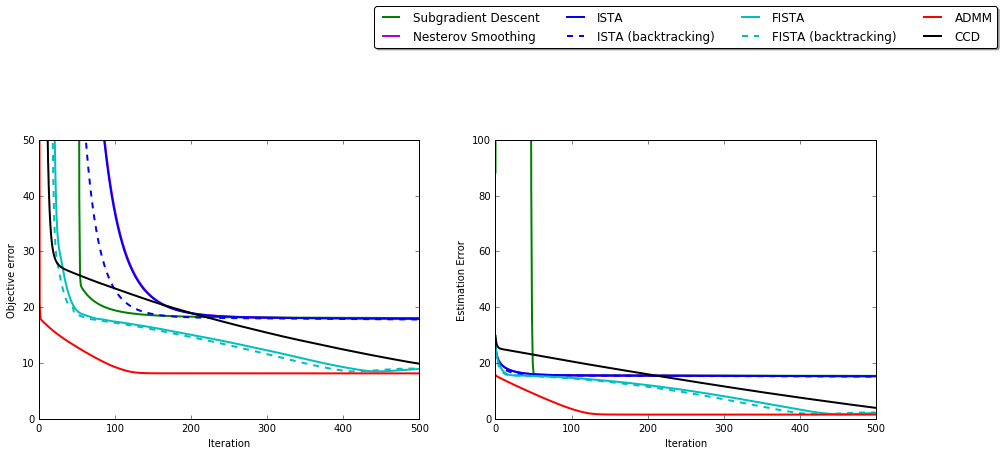

In [53]:
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(t, np.array(obj_SD), 'g', linewidth = 2, label = 'Subgradient Descent')
plt.plot(t, np.array(obj_SM), 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.plot(t, np.array(obj_PG), 'b', linewidth = 2, label = 'ISTA')
plt.plot(t, np.array(obj_PG_LS), 'b--', linewidth = 2, label = 'ISTA (backtracking)')
plt.plot(t, np.array(obj_APG), 'c', linewidth = 2, label = 'FISTA')
plt.plot(t, np.array(obj_APG_LS), 'c--', linewidth = 2, label = 'FISTA (backtracking)')
plt.plot(t, np.array(obj_ADMM), 'r', linewidth = 2, label = 'ADMM')
plt.plot(t, np.array(obj_CCD), 'k', linewidth = 2, label = 'CCD')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=4, fancybox=True, shadow=True)
plt.ylim(0, 50)
plt.xlabel('Iteration')
plt.ylabel('Objective error')
plt.subplot(122)
plt.plot(t, np.array(error_SD), 'g', linewidth = 2, label = 'Subgradient Descent')
plt.plot(t, np.array(error_SM), 'm', linewidth = 2, label = 'Nesterov Smoothing')
plt.plot(t, np.array(error_PG), 'b', linewidth = 2, label = 'ISTA')
plt.plot(t, np.array(error_PG_LS), 'b--', linewidth = 2, label = 'ISTA (backtracking)')
plt.plot(t, np.array(error_APG), 'c', linewidth = 2, label = 'FISTA')
plt.plot(t, np.array(error_APG_LS), 'c--', linewidth = 2, label = 'FISTA (backtracking)')
plt.plot(t, np.array(error_ADMM), 'r', linewidth = 2, label = 'ADMM')
plt.plot(t, np.array(error_CCD),'k', linewidth = 2, label = 'CCD')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=4, fancybox=True, shadow=True)
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.ylim(0, 100)

In [54]:
mom_error_SD, mom_obj_SD, mom_x_SD = MOM_SD(X, y, beta_0, K, max_iter, lamda)
mom_error_SM, mom_obj_SM, mom_x_SM = MOM_SM(X, y, beta_0, K, max_iter, lamda)
mom_error_PG, mom_obj_PG, mom_x_PG = MOM_PG(X, y, beta_0, K, max_iter, lamda)
mom_error_PG_LS, mom_obj_PG_LS, mom_x_PG_LS = MOM_PG_LS(X, y, beta_0, K, max_iter, lamda)
mom_error_APG, mom_obj_APG, mom_x_APG = MOM_APG(X, y, beta_0, K, max_iter, lamda)
mom_error_APG_LS, mom_obj_APG_LS, mom_x_APG_LS = MOM_APG_LS(X, y, beta_0, K, max_iter, lamda)
mom_error_ADMM, mom_obj_ADMM, mom_x_ADMM = MOM_ADMM(X, y,beta_0, K, max_iter, lamda)
mom_error_CCD, mom_obj_CCD, mom_x_CCD = MOM_coord_descent(X, y,beta_0, K, max_iter, lamda)

Lauching MOM-SD solver...
Lauching MOM-SM solver...
Lauching MOM-PG solver...
Lauching MOM-PG-LS solver...
Lauching MOM-APG solver...
Lauching MOM-APG-LS solver...

Lauching MOM-CCD solver...
   it    |   obj    |   err   
0 | 108469.16986176414 | 31.6227831752776
20 | 2847277.5882616197 | 180.37242396769932
40 | 140086369.72574347 | 1230.0197380443733
60 | 9861854784.781961 | 9852.873702633367
80 | 588979990016.1458 | 84267.83917023674
100 | 8195681631541.206 | 323579.55661405827
120 | 90945764859540.39 | 1068818.8090238213
140 | 1893584842215921.5 | 4848308.814050224
160 | 6.619593739884106e+16 | 29750667.79381252
180 | 2.1604978461377313e+18 | 159266577.24750143
200 | 1.216227457582266e+19 | 437027880.38399965
220 | 7.282026327633877e+20 | 2760654152.9626455
240 | 2.902130854339668e+22 | 18849137066.767975
260 | 1.1672518287509625e+24 | 118928968528.32394
280 | 1.8055074057996814e+25 | 472725726626.57245
300 | 2.327492967065432e+26 | 1594828136097.4094
320 | 1.1561461503940197e+28 |

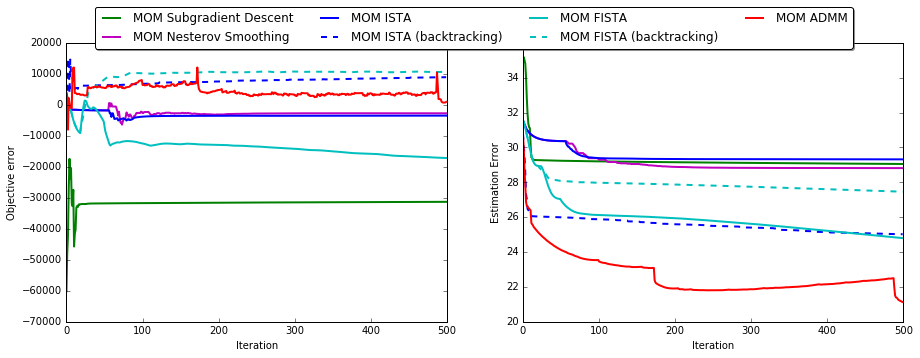

In [61]:
t = np.arange(0, max_iter)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(t, np.array(mom_obj_SD), 'g', linewidth = 2, label = 'MOM Subgradient Descent')
plt.plot(t, np.array(mom_obj_SM), 'm', linewidth = 2, label = 'MOM Nesterov Smoothing')
plt.plot(t, np.array(mom_obj_PG), 'b', linewidth = 2, label = 'MOM ISTA')
plt.plot(t, np.array(mom_obj_PG_LS), 'b--', linewidth = 2, label = 'MOM ISTA (backtracking)')
plt.plot(t, np.array(mom_obj_APG), 'c', linewidth = 2, label = 'MOM FISTA')
plt.plot(t, np.array(mom_obj_APG_LS), 'c--', linewidth = 2, label = 'MOM FISTA (backtracking)')
plt.plot(t, np.array(mom_obj_ADMM), 'r', linewidth = 2, label = 'MOM ADMM')
#plt.plot(t, np.array(mom_obj_CCD),'k', linewidth = 2, label = 'MOM CCD')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=4, fancybox=True, shadow=True)
plt.xlabel('Iteration')
plt.ylabel('Objective error')
#plt.ylim(-100, 100)
plt.subplot(122)
plt.plot(t, np.array(mom_error_SD), 'g', linewidth = 2, label = 'MOM Subgradient Descent')
plt.plot(t, np.array(mom_error_SM), 'm', linewidth = 2, label = 'MOM Nesterov Smoothing')
plt.plot(t, np.array(mom_error_PG), 'b', linewidth = 2, label = 'MOM ISTA')
plt.plot(t, np.array(mom_error_PG_LS), 'b--', linewidth = 2, label = 'MOM ISTA (backtracking)')
plt.plot(t, np.array(mom_error_APG), 'c', linewidth = 2, label = 'MOM FISTA')
plt.plot(t, np.array(mom_error_APG_LS), 'c--', linewidth = 2, label = 'MOM FISTA (backtracking)')
plt.plot(t, np.array(mom_error_ADMM), 'r', linewidth = 2, label = 'MOM ADMM')
#plt.plot(t, np.array(mom_error_CCD),'k',  linewidth = 2, label = 'CCD ADMM')
plt.legend(loc='upper center', bbox_to_anchor=(-0.13, 1.15), ncol=4, fancybox=True, shadow=True)
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
#plt.ylim(0, 100)
titre = 'N{}-d{}-s{}-sigma{}-K{}.png'.format(n_samples, n_features, sparsity, sigma, K)
plt.savefig(titre)